In [17]:
from numpy import array
from math import sqrt
import matplotlib.pyplot as plt
% matplotlib inline

from pyspark import SparkContext
from pyspark.mllib.clustering import KMeans, KMeansModel

In [4]:
sc = SparkContext()

In [63]:
# Load and parse the data
data = sc.textFile('./lastfm-dataset-360k-small/merged-subset2.csv')
data.take(2)

[',userId,artistId,artist,plays,gender,age,country,signupDate',
 '0,03b9c645bc4f578ea1dcb6a975e7ea71fab79da2,a16371b9-7d36-497a-a9d4-42b0a0440c5e,slowdive,0.08359133126934984,m,28.0,Germany,2006-09-16']

How the data should look like - [array([ 0.,  0.,  0.]), array([ 0.1,  0.1,  0.1])]

### Make a list from every line

In [67]:
data = data.map(lambda x: x.split(','))
header = data.first()

### Clean Data

In [68]:
#Remove header
data2 = data.filter(lambda line: line!=header)
# x[4] --> plays/day; x[5] --> gender; x[6] --> age; x[7] --> Country
print ("length of uncleaned data -",data2.count())
# data2.map(lambda x : len(x[1])).collect()
# data2 = data2.filter(lambda x : len(x[1]) == 36) #Clean data - remove artists without artistId

length of uncleaned data - 10000


In [70]:
data2.first()

['0',
 '03b9c645bc4f578ea1dcb6a975e7ea71fab79da2',
 'a16371b9-7d36-497a-a9d4-42b0a0440c5e',
 'slowdive',
 '0.08359133126934984',
 'm',
 '28.0',
 'Germany',
 '2006-09-16']

In [10]:
# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [32]:
# Build the model (cluster the data)
kdict = dict.fromkeys(range(2,7)) #initialize dictionary with user_id keys
for k in kdict.keys():
    clusters = KMeans.train(parsedData, k, maxIterations=100, initializationMode="kmeans||")
#     print (k)
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y) #Within Cluster Sum of Squares
    kdict[k] = WSSSE
# print("Within Set Sum of Squared Error = " + str(WSSSE))

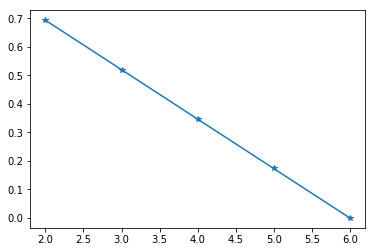

In [33]:
plt.plot(list(kdict.keys()),list(kdict.values()), '*-')

In [37]:
clusters = KMeans.train(parsedData, 5, maxIterations=100, initializationMode="kmeans||")
WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y) #Within Cluster Sum of Squares
print(WSSSE)

0.17320508075688776


In [41]:
parsedData.take(3)

[array([ 0.,  0.,  0.]), array([ 0.1,  0.1,  0.1]), array([ 0.2,  0.2,  0.2])]

In [47]:
clusters.predict([ 0.2,  0.2,  0.2])

2

In [53]:
output = parsedData.map(lambda i: [i, clusters.predict(i)])

In [55]:
output.collect()

[[array([ 0.,  0.,  0.]), 0],
 [array([ 0.1,  0.1,  0.1]), 0],
 [array([ 0.2,  0.2,  0.2]), 2],
 [array([ 9.,  9.,  9.]), 1],
 [array([ 9.1,  9.1,  9.1]), 4],
 [array([ 9.2,  9.2,  9.2]), 3]]

In [56]:
output.filter(lambda x: x[1] == 0).collect()

[[array([ 0.,  0.,  0.]), 0], [array([ 0.1,  0.1,  0.1]), 0]]